# Spotify: Top 200 Weekly (Global) Song Analysis

## Problem Statement & EDA

### Problem Statement:

Utilizing Spotify's Top 200 Weekly (Global) charts from 2020 and 2021, can we identify what makes a song popular based on specific features of a song?

For this project, I will build a regression model to predict a song's popularity. Model performance will be determined by the root mean squared error and R2 score. The success of the model will be measured by an increase of at least 10% from the baseline score.

By looking into this problem, this could potentially help new musicians or independent artistswho are trying to get their song recognized.

### Methods and Models:

In this noteboook, I will perform initial data cleaning and exploratory data analysis. In the second notebook [02_Preprocessing_and_Modeling](./02_preprocessing_and_modeling.ipynb), I will do preprocessing steps such as using polynomial features. Lastly, I will test my dataset by creating regression models such as linear regression, decision tree, and random forest. I will fine tune the linear regression model with regularization metrics such as LASSO and look into the hyper-parameters and parameters. I will also gridsearch the decision tree and random forest to tune hyper-parameters.

### Risks and Assumptions:

A potential challenge for this problem statement is if an artist is independent or doesn’t have a record label, they might not have as much exposure to be on the top list even if commonality in song features matches what a top song may be.

Due to the high amounts of genres (335), a risk and assumption I have made while data cleaning is to group these sub-genres into larger groups of genres and creating a condensed list of 14 genres.

### Data Source

The dataset I will be using comes from [`Kaggle`](https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021)
(CSV format)
- [`spotify_dataset.csv`](./datasets/spotify_dataset.csv): Spotify Dataset

### Contents:
- [Import and Cleaning](#Import-and-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

### Import and Cleaning

Libriaries imported:

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

%matplotlib inline

Reading in the data:

In [34]:
initial_df = pd.read_csv('./datasets/spotify_dataset.csv')

Display the first 5 rows:

In [35]:
pd.set_option('display.max_columns', None)
initial_df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [36]:
# Shape of Dataset
initial_df.shape

(1556, 23)

In [37]:
# Descriptive Statistics
initial_df.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


In [38]:
# Datatypes in Dataframe
initial_df.dtypes

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

Utilizing .dtypes, I see that many of the columns that are object should be an integer or float.
I will remove 'Index' as it is repetitive to the index already provided.


In [39]:
# Setting `Index` as Index
initial_df.set_index("Index", inplace = True)

Check for missing values:

In [40]:
initial_df.isnull().sum()

Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

There seems to be no missing values.

<AxesSubplot:>

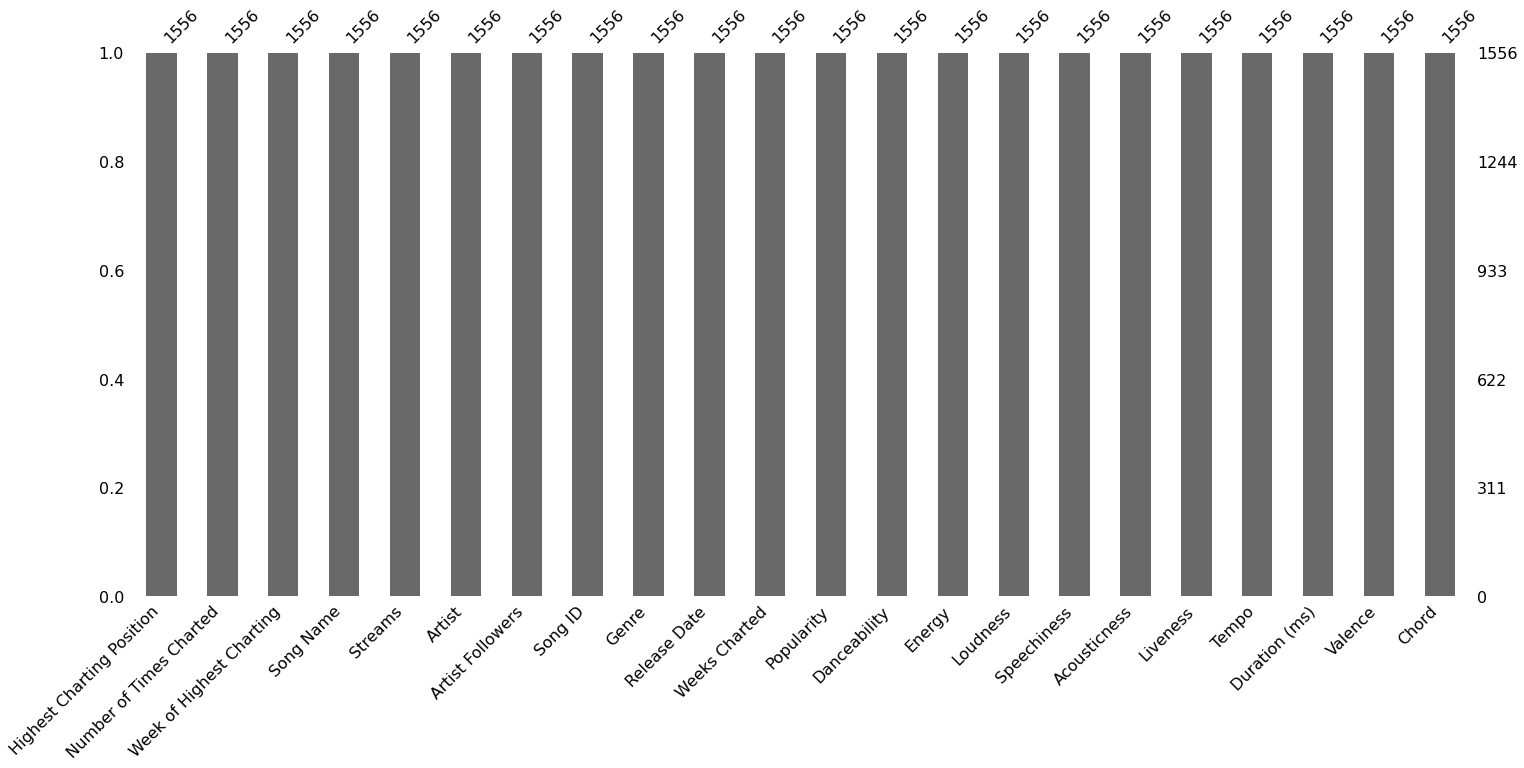

In [41]:
# Visual Representation of Null Values
msno.bar(initial_df)

#### Renaming Columns

In [42]:
# Lowercase Column Names
initial_df.columns = map(str.lower, initial_df.columns)

In [43]:
initial_df.columns = initial_df.columns.str.replace(' ', '_')
initial_df = initial_df.rename(columns={'duration_(ms)':'duration_ms'})

In [44]:
# Removing Commas in `Streams`
initial_df['streams'] = initial_df['streams'].str.replace(',','')

In [45]:
# Changing object to float
numeric_columns = ['streams', 'artist_followers', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'liveness', 'tempo', 'duration_ms', 'valence']
initial_df[numeric_columns] = initial_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

I changed 'streams', 'artist_followers', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'tempo', 'duration_ms', 'valence' from object to float as these seem to be important features that will be used in determining if a song will be a hit.

#### Missing Values

In [46]:
initial_df.isnull().sum()

highest_charting_position     0
number_of_times_charted       0
week_of_highest_charting      0
song_name                     0
streams                       0
artist                        0
artist_followers             11
song_id                       0
genre                         0
release_date                  0
weeks_charted                 0
popularity                   11
danceability                 11
energy                       11
loudness                     11
speechiness                  11
acousticness                 11
liveness                     11
tempo                        11
duration_ms                  11
valence                      11
chord                         0
dtype: int64

After changing the features above to a float, we see there is missing data. This missing data was not seen when utilizing the .isnull() because the values in the rows were blank. Therefore, when the rows were changed to floats instead of objects, they became null. Because this makes up 0.007 of the data, I will remove the rows.

In [47]:
# Danceability Null Values
initial_df[initial_df['danceability'].isnull()]

,highest_charting_position,number_of_times_charted,week_of_highest_charting,song_name,streams,artist,artist_followers,song_id,genre,release_date,weeks_charted,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence,chord
Index,,,,,,,,,,,,,,,,,,,,,,
36,36,1,2021-07-23--2021-07-30,NOT SOBER (feat. Polo G & Stunna Gambino),11869336.0,The Kid LAROI,NaN,,,,2021-07-23--2021-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
164,5,39,2020-10-30--2020-11-06,34+35,5453159.0,Ariana Grande,NaN,,,,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
465,118,1,2021-03-26--2021-04-02,Richer (feat. Polo G),6292362.0,Rod Wave,NaN,,,,2021-03-26--2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
531,20,5,2021-01-15--2021-01-22,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...",6162453.0,Ariana Grande,NaN,,,,2021-02-19--2021-02-26\n2021-02-12--2021-02-19...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
637,22,6,2020-12-18--2020-12-25,Driving Home for Christmas - 2019 Remaster,8804531.0,Chris Rea,NaN,,,,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
655,73,1,2020-12-18--2020-12-25,Thank God It's Christmas - Non-Album Single,10509961.0,Queen,NaN,,,,2020-12-18--2020-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
751,19,20,2020-07-31--2020-08-07,"Agua (with J Balvin) - Music From ""Sponge On T...",5358940.0,Tainy,NaN,,,,2020-11-20--2020-11-27\n2020-11-13--2020-11-20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
785,76,14,2020-09-04--2020-09-11,"Lean (feat. Towy, Osquel, Beltito & Sammy & Fa...",4739241.0,"Super Yei, Jone Quest",NaN,,,,2020-11-13--2020-11-20\n2020-11-06--2020-11-13...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
877,164,4,2020-09-18--2020-09-25,+Linda,4964708.0,Dalex,NaN,,,,2020-09-25--2020-10-02\n2020-09-18--2020-09-25...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


By looking at the dataframe above, we see that the rows that have missing values are rows that also have blank categorical columns. By removing the 11 rows, we should have no null/empty values.

In [48]:
# Dropping Null Values
initial_df = initial_df.dropna(subset=numeric_columns)

In [49]:
# Removing Columns
initial_df = initial_df.drop(columns=['song_id'])

In [50]:
# `Release Date` to DateTime
initial_df['release_date'] = pd.to_datetime(initial_df['release_date'])

In [51]:
# New Column Start Week of Highest Charting from `week_highest_charting`
initial_df['start_week_highest_charting'] = initial_df['week_of_highest_charting'].str.slice(stop=10)
# Column to DateTime
initial_df['start_week_highest_charting'] = pd.to_datetime(initial_df['start_week_highest_charting'])

# New Column End Week of Highest Charting from `week_highest_charting`
initial_df['end_week_highest_charting'] = initial_df['week_of_highest_charting'].str.slice(-10)
# Column to DateTime
initial_df['end_week_highest_charting'] = pd.to_datetime(initial_df['end_week_highest_charting'])

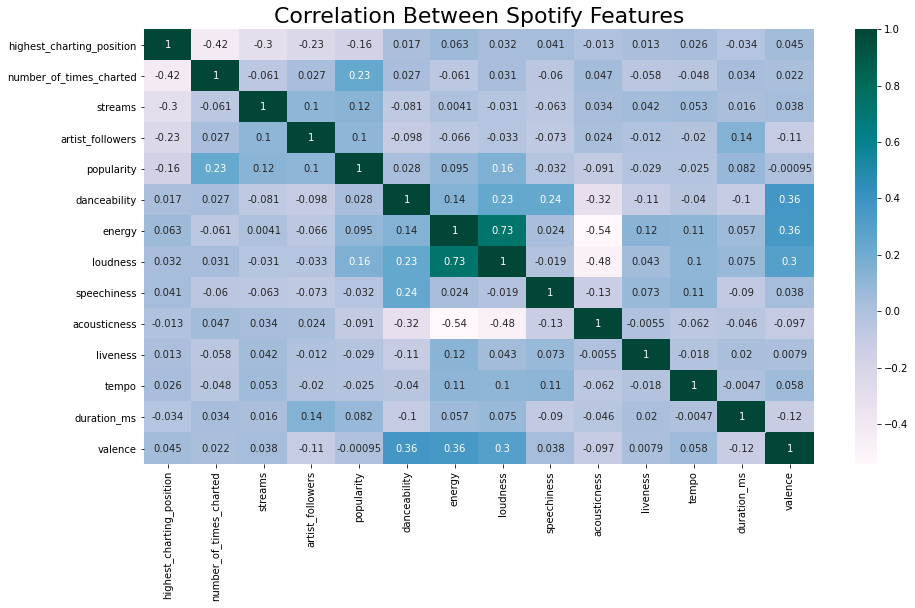

In [52]:
# Heatmap
plt.figure(figsize = (15,8))
plt.title('Correlation Between Spotify Features', fontsize = 22)
sns.heatmap(initial_df.corr(), cmap="PuBuGn", annot=True);

The above heatmap represents the correlation between the Spotify dataset's features. There is a strong negative correlation between the number times charted and highest charting position. This makes sense because an artist would want a high number of times charted while wanting a low highest charting position. Highest streams and artist followers also have negative correlation with highest charting position and this would be for the same reason as it has an inverse relationship.

Strong correlations observed:
-energy and loudness (+0.73): This correlation is consistent since energy is described as "fast, loud, and noisy"
-energy and acoustiness (-0.54): This negative correlation makes sense because acoustic versions of songs are without any electrical equipment which would most likely have less energy.
-loudness and acoustiness (-0.48): This negative correlation makes sense because acoustic versions of songs are without any electrical equipment which would most likely be not as loud.
-danceability and acousticness (-0.32): Because acoustic versions of songs are not as loud, it would make sense that there would be an inverse relationship with danceabilility 
-energy and acousticness (-0.54): This correlation is consistent since energy is described as "fast, loud, and noisy" and acoustic music is softer.

Valence may also be a feature to further look into as danceability, energy, and loudness have positive medium correlation.

#### Utilizing CountVectorizer: `Genre`

I am going to use CountVectorizer to count the number of different words that appear in the column `Genre`. Because there are 335 different genres, I am going to look at the top counts and pick the top genres and place the remaining genres into those main top categories. I will also look at different n-gram ranges for genres that may be split into two words, but is one genre (ex. hip hop).

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cvec = CountVectorizer(ngram_range=(1, 2))

In [54]:
# Define X
X = initial_df['genre']

In [55]:
# Fit CountVectorizer
cvec.fit(X)
# Transform
X_countvec = cvec.transform(X)
X.head()

Index
1    ['indie rock italiano', 'italian pop']
2                    ['australian hip hop']
3                                   ['pop']
4                         ['pop', 'uk pop']
5             ['lgbtq+ hip hop', 'pop rap']
Name: genre, dtype: object

In [56]:
# Matrix
X_countvec.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

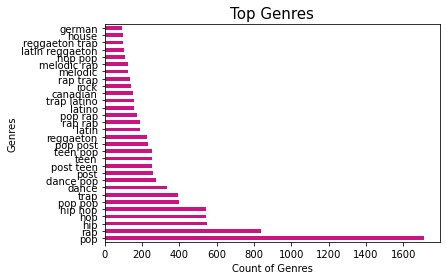

In [57]:
# Bar Plot of Top Words (Genre)
params = {'axes.titlesize':'15',
          'xtick.labelsize':'10',
          'ytick.labelsize':'10'}
plt.rcParams.update(params)
X_wordcount = pd.DataFrame(X_countvec.todense(), columns = cvec.get_feature_names())
X_wordcount.sum().sort_values(ascending=False).head(30).plot.barh(color='#CB1381')
plt.title('Top Genres')
plt.ylabel('Genres')
plt.xlabel('Count of Genres')
plt.show();

Looking at the above horizontal bar plot, pop and rap dominates the genres. Because Count Vectorizer takes each word and counts it, it split genres such as hip hop to 'hip' and 'hop'. I utilized an n-gram range This bar plot gives us a general consensus on what the top genres are. Utilziing this data, I will make broader "family" genre categories to put all 335 sub-genres into.

In [58]:
# Word Count for Genre
X_wordcount.sum().sort_values(ascending=False).head(30)

pop                1708
rap                 837
hip                 548
hop                 543
hip hop             543
pop pop             398
trap                395
dance               332
dance pop           273
post                257
post teen           256
teen                256
teen pop            256
pop post            232
reggaeton           226
latin               188
rap rap             187
pop rap             171
latino              156
trap latino         155
canadian            150
rock                142
rap trap            136
melodic             126
melodic rap         124
hop pop             110
latin reggaeton     106
reggaeton trap      100
house                99
german               90
dtype: int64

In [59]:
# Looking into nationality genres 'Canadian'
initial_df[initial_df['genre'].str.contains('canadian')].head()

,highest_charting_position,number_of_times_charted,week_of_highest_charting,song_name,streams,artist,artist_followers,genre,release_date,weeks_charted,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence,chord,start_week_highest_charting,end_week_highest_charting
Index,,,,,,,,,,,,,,,,,,,,,,,
14,1,19,2021-04-02--2021-04-09,Peaches (feat. Daniel Caesar & Giveon),20294457.0,Justin Bieber,48504126.0,"['canadian pop', 'pop', 'post-teen pop']",2021-03-19,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,94.0,0.677,0.696,-6.181,0.1190,0.32100,0.4200,90.030,198082.0,0.464,C,2021-04-02,2021-04-09
18,5,14,2021-04-23--2021-04-30,Save Your Tears (with Ariana Grande) (Remix),18053141.0,The Weeknd,35305637.0,"['canadian contemporary r&b', 'canadian pop', ...",2021-04-23,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,94.0,0.650,0.825,-4.645,0.0325,0.02150,0.0936,118.091,191014.0,0.593,C,2021-04-23,2021-04-30
25,1,83,2020-06-12--2020-06-19,Blinding Lights,15011809.0,The Weeknd,35305637.0,"['canadian contemporary r&b', 'canadian pop', ...",2020-03-20,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,92.0,0.514,0.730,-5.934,0.0598,0.00146,0.0897,171.005,200040.0,0.334,C#/Db,2020-06-12,2020-06-19
64,2,34,2021-02-26--2021-03-05,Save Your Tears,8843110.0,The Weeknd,35305637.0,"['canadian contemporary r&b', 'canadian pop', ...",2021-04-23,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,94.0,0.650,0.825,-4.645,0.0325,0.02150,0.0936,118.091,191014.0,0.593,C,2021-02-26,2021-03-05
71,71,1,2021-07-23--2021-07-30,Over The Top (feat. Drake),8269753.0,Smiley,26131.0,"['canadian hip hop', 'toronto rap']",2021-07-23,2021-07-23--2021-07-30,83.0,0.833,0.498,-5.196,0.1170,0.04930,0.1190,139.928,153406.0,0.259,A#/Bb,2021-07-23,2021-07-30


I decided to choose 14 different family genres. This was decided based on the count of each genre and that each genre had at least 40 songs. I did not include songs that had genres with nationalities as a family genre as most of those genres had more than just its nationality (ex. Canadian pop would go into the pop genre or Canadian contemporary would go into contemporary).

In [60]:
# Helper Function for List of Genres
genre_list = []
final_list = []

for row in initial_df.index:
    genres = initial_df.loc[row,'genre'][1:-1].split(', ')
    for gen in genres:
        genre_list.append(gen[1:-1]) #all genres listed from each song
        

for gen in genre_list:
    if gen not in final_list:
        final_list.append(gen) # condensed list of genres
genre_list     
final_list

['indie rock italiano',
 'italian pop',
 'australian hip hop',
 'pop',
 'uk pop',
 'lgbtq+ hip hop',
 'pop rap',
 'dance pop',
 'puerto rican pop',
 'trap latino',
 'latin',
 'reggaeton',
 'reggaeton colombiano',
 'k-pop',
 'k-pop boy group',
 'canadian pop',
 'post-teen pop',
 'canadian contemporary r&b',
 'gauze pop',
 'indietronica',
 'shiver pop',
 'latin hip hop',
 'dfw rap',
 'melodic rap',
 'rap',
 'house',
 'pop dance',
 'tropical house',
 'uk dance',
 'electropop',
 'colombian pop',
 'chicago rap',
 'panamanian pop',
 'latin pop',
 'pop argentino',
 'big room',
 'brostep',
 'dutch edm',
 'edm',
 'electro house',
 'slap house',
 'trance',
 'cali rap',
 'trap argentino',
 '',
 'argentine hip hop',
 'pop venezolano',
 'progressive electro house',
 'dreamo',
 'indie surf',
 'surf punk',
 'vegas indie',
 'pop rock',
 'piano rock',
 'houston rap',
 'trap queen',
 'german dance',
 'german techno',
 'german trance',
 'r&b',
 'modern alternative rock',
 'modern rock',
 'canadian hip ho

In [61]:
# Function to sort all genres into family genres
def sort_genres(all_genres_list):
    top_genres_dict = {
        'trap': [],
        'rap': [],
        'electropop': [],
        'pop': [],
        'hip hop': [],
        'reggaeton': [],
        'latin': [],
        'rock': [],
        'house': [],
        'edm': [],
        'contemporary': [],
        'indie': [],
        'dance': [],
        'other': []
    }
    for genre in all_genres_list:
        add_genres_to_dict(top_genres_dict, genre)
    return top_genres_dict

def add_genres_to_dict(top_genres, genre):
    if 'trap' in genre:
        top_genres['trap'].append(genre)
    elif 'rap' in genre:
        top_genres['rap'].append(genre)   
    elif 'electropop' in genre:
        top_genres['electropop'].append(genre)        
    elif 'pop' in genre:
        top_genres['pop'].append(genre)        
    elif 'hip hop' in genre:
        top_genres['hip hop'].append(genre)
    elif 'reggaeton' in genre:
        top_genres['reggaeton'].append(genre)
    elif 'latin' in genre:
        top_genres['latin'].append(genre)
    elif 'rock' in genre:
        top_genres['rock'].append(genre)
    elif 'house' in genre:
        top_genres['house'].append(genre)
    elif 'edm' in genre:
        top_genres['edm'].append(genre)
    elif 'contemporary' in genre:
        top_genres['contemporary'].append(genre)
    elif 'indie' in genre:
        top_genres['indie'].append(genre)
    elif 'dance' in genre:
        top_genres['dance'].append(genre)
    else:
        top_genres['other'].append(genre)

In [62]:
# Function ot check duplicates in genre
genre_family_to_genre = sort_genres(final_list)

count_dict = {}
for genre_list in genre_family_to_genre.values():
    for genre in genre_list:
        count_dict[genre] = count_dict.get(genre, 0)+1

genre_counts = pd.Series(count_dict)
genre_counts.sort_values(ascending=False)

trap latino          1
afrofuturism         1
aussietronica        1
brooklyn drill       1
r&b                  1
                    ..
italian indie pop    1
indonesian pop       1
indie poptimism      1
synthpop             1
moombahton           1
Length: 335, dtype: int64

In [63]:
# Dictionary for genre to genre family
genre_to_genre_family = {
    genre:genre_family for genre_family, genre_list in genre_family_to_genre.items() for genre in genre_list
}

genre_to_genre_family

{'trap latino': 'trap',
 'trap argentino': 'trap',
 'trap queen': 'trap',
 'canadian trap': 'trap',
 'trap': 'trap',
 'trap soul': 'trap',
 'vapor trap': 'trap',
 'german trap': 'trap',
 'atl trap': 'trap',
 'trap triste': 'trap',
 'electronic trap': 'trap',
 'trap boricua': 'trap',
 'trap italiana': 'trap',
 'trap chileno': 'trap',
 'trap brasileiro': 'trap',
 'turkish trap': 'trap',
 'pop rap': 'rap',
 'dfw rap': 'rap',
 'melodic rap': 'rap',
 'rap': 'rap',
 'chicago rap': 'rap',
 'cali rap': 'rap',
 'houston rap': 'rap',
 'toronto rap': 'rap',
 'nyc rap': 'rap',
 'rap conciencia': 'rap',
 'rap latina': 'rap',
 'viral rap': 'rap',
 'sad rap': 'rap',
 'german alternative rap': 'rap',
 'london rap': 'rap',
 'dmv rap': 'rap',
 'frauenrap': 'rap',
 'rap francais': 'rap',
 'rap marseille': 'rap',
 'emo rap': 'rap',
 'rap dominicano': 'rap',
 'rap metal': 'rap',
 'rap conscient': 'rap',
 'gangster rap': 'rap',
 'old school rap francais': 'rap',
 'rhode island rap': 'rap',
 'indie pop rap':

In [64]:
from ast import literal_eval

all_genres = initial_df['genre']
# Literal eval to string
all_genres = all_genres.map(literal_eval)
all_genres

Index
1                [indie rock italiano, italian pop]
2                              [australian hip hop]
3                                             [pop]
4                                     [pop, uk pop]
5                         [lgbtq+ hip hop, pop rap]
                           ...                     
1552                       [dance pop, pop, uk pop]
1553           [sertanejo, sertanejo universitario]
1554    [dance pop, electropop, pop, post-teen pop]
1555                     [brega funk, funk carioca]
1556                           [pop, post-teen pop]
Name: genre, Length: 1545, dtype: object

In [65]:
# Explode all_genres & map to dictionary
all_genres = all_genres.explode().map(genre_to_genre_family)

In [66]:
# Dummify all_genres
all_genres = pd.get_dummies(all_genres)
# Groupby index of all_genres with sum of all_genres
all_genres = all_genres.groupby(all_genres.index).sum()

In [67]:
# all_genres to CSV
all_genres.to_csv('./datasets/genres.csv', index=True)

In [68]:
# Concatenate initial_df and all_genres to dfc
df = pd.concat([initial_df, all_genres], axis=1)
df.head()

,highest_charting_position,number_of_times_charted,week_of_highest_charting,song_name,streams,artist,artist_followers,genre,release_date,weeks_charted,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence,chord,start_week_highest_charting,end_week_highest_charting,contemporary,dance,edm,electropop,hip hop,house,indie,latin,other,pop,rap,reggaeton,rock,trap
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',48633449.0,Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,2021-07-23,2021-07-30,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719.0,The Kid LAROI,2230022.0,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db,2021-07-23,2021-07-30,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,11,2021-06-25--2021-07-02,good 4 u,40162559.0,Olivia Rodrigo,6266514.0,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A,2021-06-25,2021-07-02,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456.0,Ed Sheeran,83293380.0,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B,2021-07-02,2021-07-09,0,0,0,0,0,0,0,0,0,2,0,0,0,0
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454.0,Lil Nas X,5473565.0,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb,2021-07-23,2021-07-30,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [69]:
# Descriptive Statistics
df.describe()

,highest_charting_position,number_of_times_charted,streams,artist_followers,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence,contemporary,dance,edm,electropop,hip hop,house,indie,latin,other,pop,rap,reggaeton,rock,trap
count,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,87.825243,10.684142,6.337136e+06,1.471690e+07,70.089320,0.689997,0.633495,-6.348474,0.123656,0.248695,0.181202,122.811023,197940.816828,0.514704,0.028479,0.013592,0.034951,0.038835,0.351456,0.062136,0.006472,0.100971,0.288673,1.012298,0.543689,0.144337,0.082201,0.255663
std,58.132046,16.389761,3.375402e+06,1.667579e+07,15.824034,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,47148.930420,0.227326,0.166391,0.121291,0.197315,0.193264,0.717183,0.329895,0.087921,0.303529,0.736384,1.288844,0.920162,0.445772,0.505514,0.508995
min,1.000000,1.000000,4.176083e+06,4.883000e+03,0.000000,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,30133.000000,0.032000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.000000,4.915080e+06,2.123734e+06,65.000000,0.599000,0.532000,-7.491000,0.045600,0.048500,0.096600,97.960000,169266.000000,0.343000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,4.000000,5.269163e+06,6.852509e+06,73.000000,0.707000,0.642000,-5.990000,0.076500,0.161000,0.124000,122.012000,193591.000000,0.512000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,137.000000,12.000000,6.452492e+06,2.269875e+07,80.000000,0.796000,0.752000,-4.711000,0.165000,0.388000,0.217000,143.860000,218902.000000,0.691000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,200.000000,142.000000,4.863345e+07,8.333778e+07,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000,1.000000,2.000000,2.000000,1.000000,3.000000,4.000000,2.000000,2.000000,8.000000,6.000000,4.000000,3.000000,8.000000,3.000000


In [70]:
# Shape of df
df.shape

(1545, 37)

In [71]:
# df to CSV
df.to_csv('./datasets/spotify_df.csv', index=True)

### Data Dictionary

All songs reflect the Spotify Top 200 Weekly Global Charts in 2020 and 2021.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|highest_charting_position|integer|spotify_dataset|Highest charting position the song has had|
|number_times_charted|integer|spotify_dataset|Number of times the song has been charted|
|week_highest_charting|object|spotify_dataset|Week when the song had the highest position on the charts|
|song_name|object|spotify_dataset|Name of song|
|streams|float|spotify_dataset|Number of streams|
|artist|object|spotify_dataset|Name of artist|
|artist_followers|float|spotify_dataset|Number of followers the artist has on Spotify|
|genre|object|spotify_dataset|Genre the song is classified as|
|release_date|datetime|spotify_dataset|Release date of the song|
|weeks_charted|object|spotify_dataset|The weeks the song was on the Top 200|
|popularity|float|spotify_dataset|Popularity of the song from 0-100 (highest)|
|danceability|float|spotify_dataset|How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable [(source)](https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021)|
|tempo|float|spotify_dataset|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration [(source)](https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021)|
|duration_ms|float|spotify_dataset|Duration of song in milliseconds|
|valence|float|spotify_dataset|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry) [(source)](https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021)|
|chord|object|spotify_dataset|Chord of the song|
|start_week_highest_charting|datetime|spotify_df|The start of the week of highest number times charted|  
|end_week_highest_charting|datetime|spotify_df|The end of the week of highest number times charted|  
|contemporary|unsigned integer|genres|Count of songs with contemporary genre|
|edm|unsigned integer|genres|Count of songs with edm genre|
|electropop|unsigned integer|genres|Count of songs with electropop genre|
|hip hop|unsigned integer|genres|Count of songs with hip-hop genre|
|house|unsigned integer|genres|Count of songs with house genre|
|indie|unsigned integer|genres|Count of songs with indie genre|
|latin|unsigned integer|genres|Count of songs with latin genre|
|other|unsigned integer|genres|Count of songs with other genre (genres not listed)|
|pop|unsigned integer|genres|Count of songs with pop genre|
|rap|unsigned integer|genres|Count of songs with rap genre|
|reggaeton|unsigned integer|genres|Count of songs with reggaeton genre|
|rock|unsigned integer|genres|Count of songs with rock genre|
|trap|unsigned integer|genres|Count of songs with trap genre|
|dance|unsigned integer|genres|Count of songs with dance genre|




### Exploratory Data Analysis

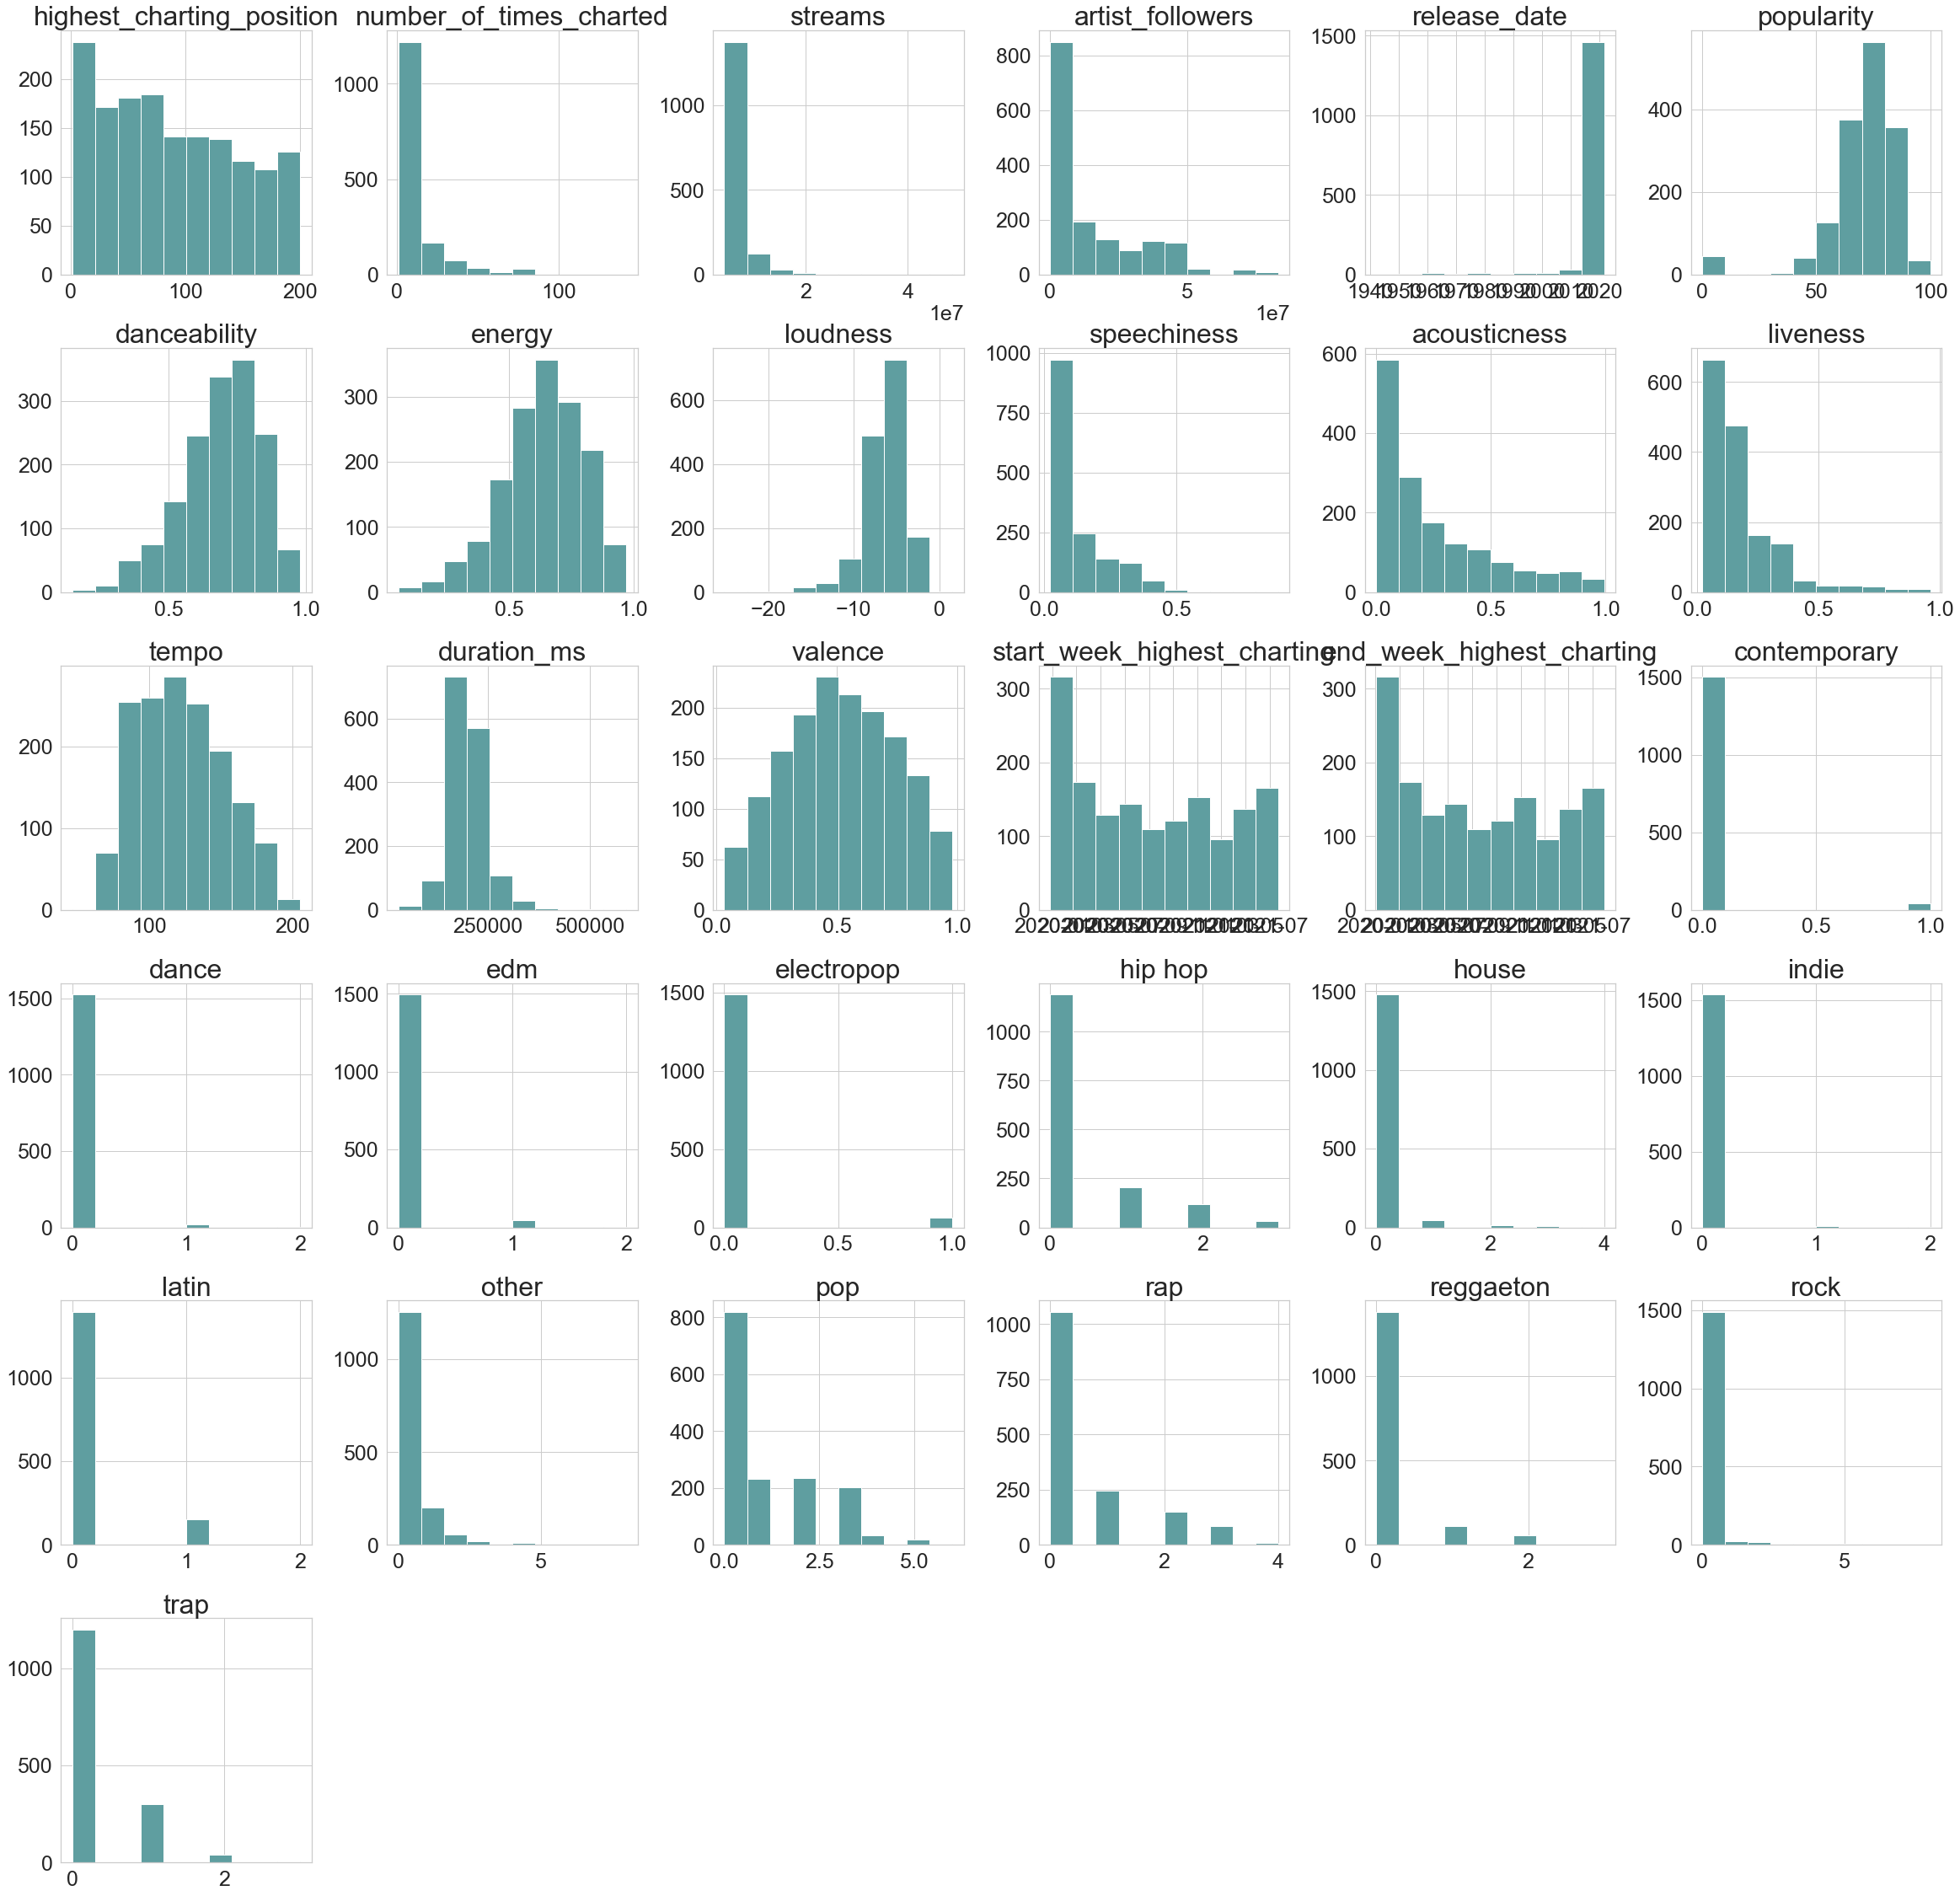

In [143]:
params = {'axes.titlesize':'32',
          'xtick.labelsize':'25',
          'ytick.labelsize':'25',
         }
plt.rcParams.update(params)
df.hist(figsize=(40,40), color='cadetblue');

Looking at the histograms above, there is a normal bell shaped curve for popularity, danceability, energy, loudness, tempo, duration_ms, and valence. This means there is a normal distribution for those features. 

#### Correlations

In [73]:
# Correlation between `streams` and non-categorical features
initial_df.corr()['streams'].sort_values(ascending=False)

streams                      1.000000
popularity                   0.123184
artist_followers             0.103251
tempo                        0.053458
liveness                     0.042105
valence                      0.038381
acousticness                 0.034054
duration_ms                  0.015964
energy                       0.004145
loudness                    -0.031155
number_of_times_charted     -0.060542
speechiness                 -0.062620
danceability                -0.081291
highest_charting_position   -0.295442
Name: streams, dtype: float64

In [74]:
# Correlation between `artist followers` and non-categorical features
initial_df.corr()['artist_followers'].sort_values(ascending=False)

artist_followers             1.000000
duration_ms                  0.142145
popularity                   0.104358
streams                      0.103251
number_of_times_charted      0.027458
acousticness                 0.023830
liveness                    -0.012491
tempo                       -0.019881
loudness                    -0.033264
energy                      -0.065613
speechiness                 -0.072968
danceability                -0.097576
valence                     -0.108804
highest_charting_position   -0.233723
Name: artist_followers, dtype: float64

In [75]:
# Correlation between `popularity` and non-categorical features
initial_df.corr()['popularity'].sort_values(ascending=False)

popularity                   1.000000
number_of_times_charted      0.232796
loudness                     0.158767
streams                      0.123184
artist_followers             0.104358
energy                       0.094691
duration_ms                  0.082096
danceability                 0.028435
valence                     -0.000953
tempo                       -0.024951
liveness                    -0.029460
speechiness                 -0.032091
acousticness                -0.091245
highest_charting_position   -0.164167
Name: popularity, dtype: float64

In [76]:
# Correlation between `number_times_charted` and non-categorical features
initial_df.corr()['number_of_times_charted'].sort_values(ascending=False)

number_of_times_charted      1.000000
popularity                   0.232796
acousticness                 0.046651
duration_ms                  0.033980
loudness                     0.031225
artist_followers             0.027458
danceability                 0.027026
valence                      0.021570
tempo                       -0.048307
liveness                    -0.058436
speechiness                 -0.060216
streams                     -0.060542
energy                      -0.061139
highest_charting_position   -0.417748
Name: number_of_times_charted, dtype: float64

#### Utilizing Seaborn's Pairplot on `streams`:

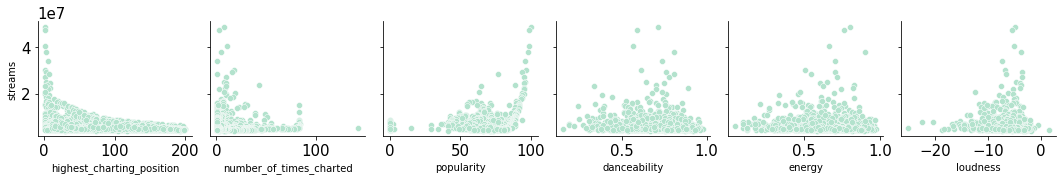

In [77]:
params = {'axes.titlesize':'15',
          'xtick.labelsize':'15',
          'ytick.labelsize':'15'}
plt.rcParams.update(params)
sns.set_palette(sns.color_palette("Pastel2"))
sns.pairplot(data=initial_df, y_vars=['streams'], x_vars=['highest_charting_position','number_of_times_charted', 'popularity','danceability', 'energy', 'loudness']);

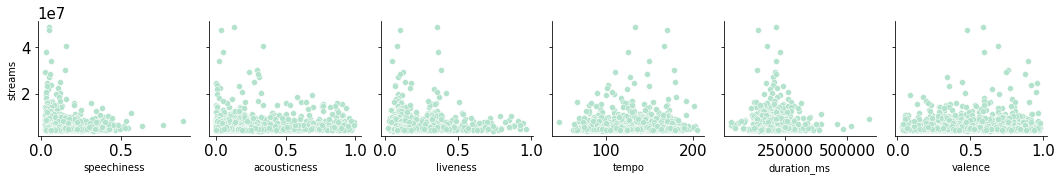

In [78]:
sns.pairplot(data=initial_df, y_vars=['streams'], x_vars=['speechiness',
       'acousticness', 'liveness', 'tempo', 'duration_ms', 'valence']);

Looking at the above pair plots, there does not seem to be any linear releationships with streams against other features from this dataset. But, looking at streams and popularity, it seems as though once we are above 75 in popularity there is a linear relationship with streams.

#### `genre`

In [79]:
# Function for count of genre
name_of_genre = []
count_of_genre = []
for genre in set(genre_to_genre_family.values()):
    name_of_genre.append(genre)
    count_of_genre.append(np.count_nonzero(df[genre]))
    
genre_count = pd.DataFrame(count_of_genre, index=name_of_genre)

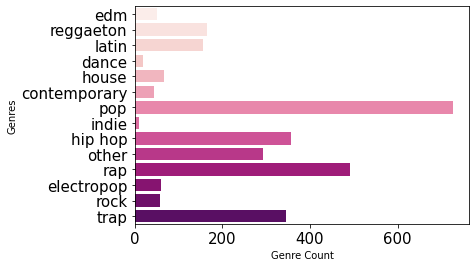

In [80]:
# Bar plot to plot genre against genre count
ax =sns.barplot(x=0, y=genre_count.index, palette='RdPu', data=genre_count)
ax.set(xlabel='Genre Count', ylabel='Genres');

From the above count plot, songs that were on the Top 200 Weekly charts on Spotify from 2020-2021 were dominated by pop categorized songs.

#### Groupby: `artist`

In [81]:
# Bar Plot
def create_barplot(x_var, num):
    fig = plt.figure(figsize = (5,5))
    ax = fig.subplots()
    x_var.sum().nlargest(num).plot(ax=ax, kind='bar')
    plt.show()

In [82]:
# Function for bar plots
def create_barplots(x_var, y_var, data, title=''):
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=y_var, y=x_var, data=data.reset_index().head(10), palette="RdPu")
    ax.set_title(title)
    #plt.xticks(rotation);

In [83]:
# Groupby Artist vs. Sum (Highest) Number of Times Charted
artist_number_times_charted = df.groupby('artist').sum().sort_values('number_of_times_charted', ascending=False).head(10)

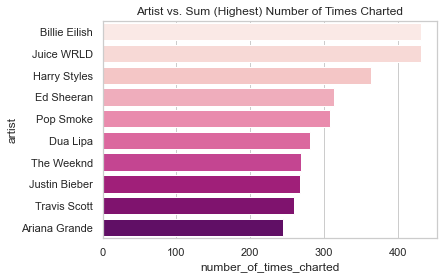

In [84]:
# Bar Plot
create_barplots('artist', 'number_of_times_charted', artist_number_times_charted, "Artist vs. Sum (Highest) Number of Times Charted")

The highest number of times charted is the number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021. Looking at the above bar plot, we see that Billie Eilish has the highest sum number of times charted. Following Billie Eilish are Juice WRLD, Harry Styles, Ed Sheeran, and Pop Smoke.

In [85]:
# Groupby Artist vs. Sum (Lowest) Number of Times Charted
lowest_artist_number_times_charted = df.groupby('artist').sum().sort_values('number_of_times_charted', ascending=True)

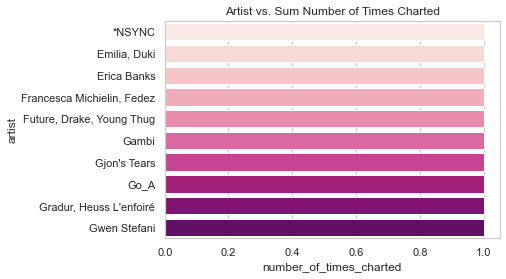

In [86]:
# Bar Plot
create_barplots('artist', 'number_of_times_charted', lowest_artist_number_times_charted, "Artist vs. Sum Number of Times Charted")

Above shows artists that made it to the top 200 charts, but had the lowest amount of times charted. There are multiple artists that have only 1 song charted. It is important to note that songs with multiple artists would appear here because most likely, they only have one song together (Future, Drake, Young Thug).

In [87]:
# Groupby Artist vs. Mean Highest Charting Position (Lowest Position)
lowest_artist_highest_charting = df.groupby('artist').mean().sort_values('highest_charting_position', ascending=False).head(10)

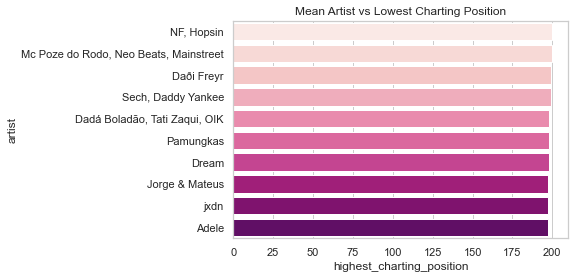

In [88]:
#Bar Plot
create_barplots('artist', 'highest_charting_position', lowest_artist_highest_charting, 'Mean Artist vs Lowest Charting Position')

The highest charting position is the highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021 where 1 represents the highest and 200 the lowest. Looking at the above bar plot, we see that the lowest sum charting position is NF, Hopsin.

In [89]:
# Groupby Artist vs. Mean Highest Charting Position (Highest Position)
artist_highest_charting = df.groupby('artist').mean().sort_values('highest_charting_position', ascending=True).head(10)

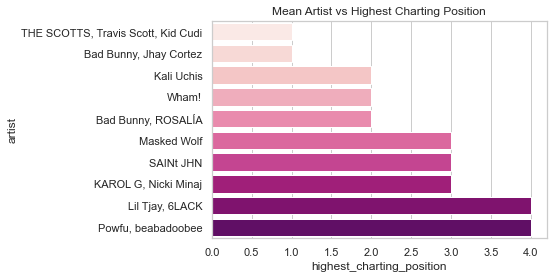

In [90]:
#Bar Plot
create_barplots('artist', 'highest_charting_position', artist_highest_charting, 'Mean Artist vs Highest Charting Position')

The artist with the highest charting position at #1 is "THE SCOTTS, Travis Scott, Kid Cudi" and "Bad Bunny, Jhay Cortez." This is interesting because the artist that hit #1 are songs with collaboration with multiple artists.

In [91]:
# Groupby Artist vs. (Highest) Sum of Streams
artist_streams = df.groupby('artist').sum().sort_values('streams', ascending=False).head(10)

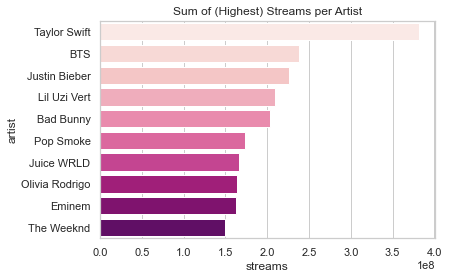

In [92]:
# Bar Plot
create_barplots('artist', 'streams', artist_streams, 'Sum of (Highest) Streams per Artist')

Streams is the number of streams a song has. Looking at the above bar plot, Taylor Swift is the top sum streams.

In [93]:
# Groupby Artist vs. (Lowest) Sum of Streams
lowest_artist_streams = df.groupby('artist').sum().sort_values('streams', ascending=True).head(10)

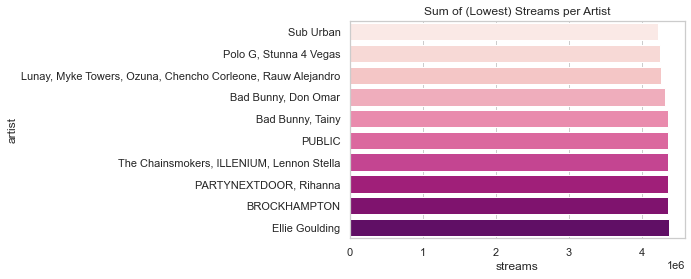

In [94]:
# Bar Plot
create_barplots('artist', 'streams', lowest_artist_streams, 'Sum of (Lowest) Streams per Artist')

The lowest sum of streams is Sub Urban. Bad Bunny appears on the lowest amount of streams and also the highest amount. This would indicate he has multiple songs (low and high streams) that made up to the top 200. This should be looked further into.

In [95]:
# Groupby Artist vs. Mean of (Highest) Popularity
artist_popularity = initial_df.groupby('artist').mean().sort_values('popularity', ascending=False)

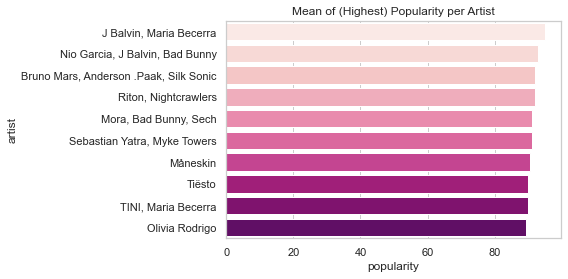

In [96]:
# Bar Plot
create_barplots('artist', 'popularity', artist_popularity, 'Mean of (Highest) Popularity per Artist')

The popularity represents the popularity of a song on a scale of 0 to 100 with 100 as most popular. When taking the mean of popularity per artist, we see J Balvin.

In [97]:
# Groupby Artist vs. Mean of (Lowest) Popularity
least_artist_popularity = initial_df.groupby('artist').mean().sort_values('popularity', ascending=True)

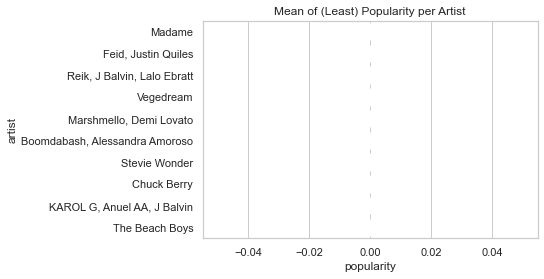

In [98]:
# Bar Plot
create_barplots('artist', 'popularity', least_artist_popularity, 'Mean of (Least) Popularity per Artist')

When looking at the lowest popularity scores, there are multiple artists with a popularity of 0. It seems as though most of these artists that have top charting songs with 0 popularity are songs that are either Christmas songs or songs in different languages.

#### Groupby: `song_names`

In [99]:
# Groupby Song Name vs. Sum of (Highest) Number of Times Charted
songs_charted = df.groupby(['song_name', 'artist']).sum().sort_values('number_of_times_charted', ascending=False)

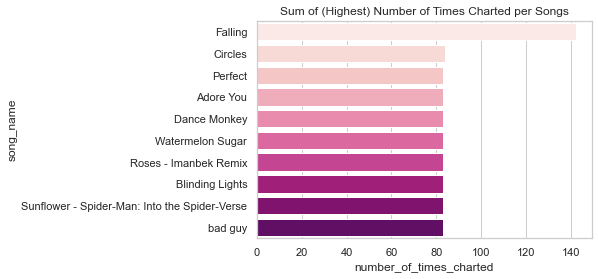

In [100]:
# Bar Plot
create_barplots('song_name', 'number_of_times_charted', songs_charted, 'Sum of (Highest) Number of Times Charted per Songs')

The above bar plot shows the song name with the sum of number of times charted. The top song is "Falling" by Harry Styles. When comparing the number times charted with song names, it does not seem to have the same artists when comparing artists to number of times charted.

In [101]:
# Groupby Song Name vs. Sum of (Highest) Number of Times Charted
lowest_songs_charted = df.groupby(['song_name', 'artist']).sum().sort_values('number_of_times_charted', ascending=True)

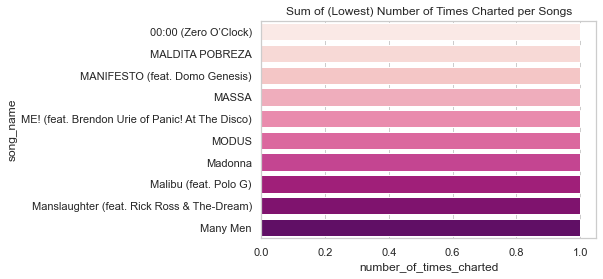

In [102]:
# Bar Plot
create_barplots('song_name', 'number_of_times_charted', lowest_songs_charted, 'Sum of (Lowest) Number of Times Charted per Songs')

The above bar plot shows the song name with the lowest sum number of times charted. The top 10 songs listed have all only been charted once. There are artists on here that are score high on overall streams and artist highest charting position so it is important to look into more specifically the components or a feature of each song.

In [103]:
# Groupby Song Name vs Highest Charting Position
song_highest_charting = df.groupby(['song_name', 'artist']).mean().sort_values('highest_charting_position', ascending=True)

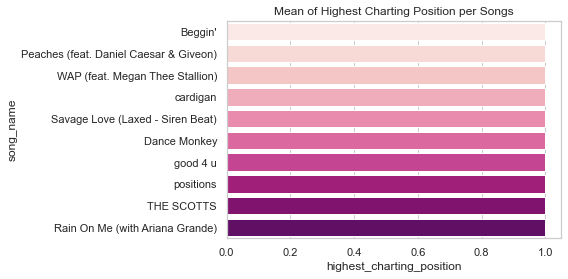

In [104]:
# Box Plot
create_barplots('song_name', 'highest_charting_position', song_highest_charting, 'Mean of Highest Charting Position per Songs')

The above bar plot shows the song name with the mean of highest charting position. Throughout 2020-2021, multiple songs hit #1 for highest charting position.

In [105]:
# Groupby Song Name vs (Lowest) Highest Charting Position
lowest_song_highest_charting = df.groupby(['song_name', 'artist']).mean().sort_values('highest_charting_position', ascending=False)

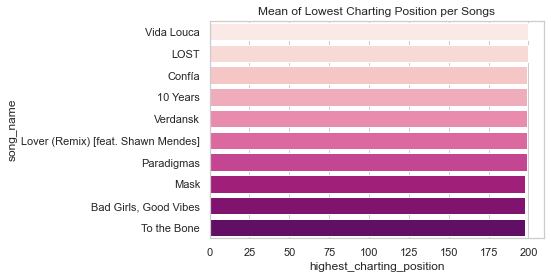

In [106]:
# Box Plot
create_barplots('song_name', 'highest_charting_position', lowest_song_highest_charting, 'Mean of Lowest Charting Position per Songs')

The above bar plot represents the lowest highest charting position per song name. These songs that were on the top 200 are correlated to songs that were only charted once on number times charted.

In [107]:
# Groupby Song Name vs Sum of (Highest) Streams
highest_song_streams = df.groupby(['song_name', 'artist']).sum().sort_values('streams', ascending=False)

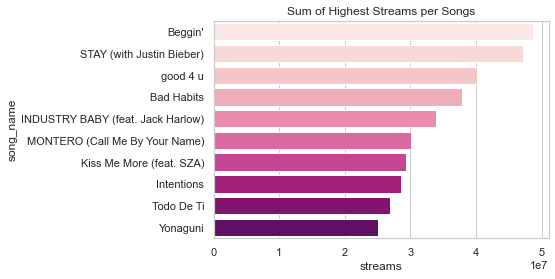

In [108]:
# Bar Plot
create_barplots('song_name', 'streams', highest_song_streams, 'Sum of Highest Streams per Songs')

Above shows the song name with the sum of streams. "Beggin'" by Måneskin with the #1 sum stream for 2020-2021.

In [109]:
# Groupby Song Name vs Least Sum of (Lowest) Streams
lowest_song_streams = df.groupby(['song_name', 'artist']).sum().sort_values('streams', ascending=True)

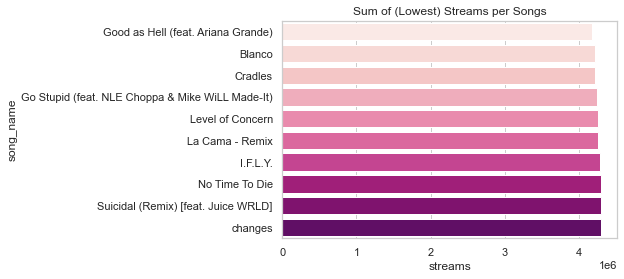

In [110]:
# Bar Plot
create_barplots('song_name', 'streams', lowest_song_streams, 'Sum of (Lowest) Streams per Songs')

The above bar plot represents the song name with the least amount of sum streams.

In [111]:
# Groupby Song Name vs Mean of (Highest) Popularity
highest_song_popularity = df.groupby(['song_name', 'artist']).mean().sort_values('popularity', ascending=False)

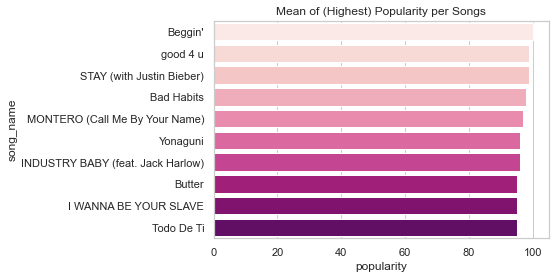

In [112]:
create_barplots('song_name', 'popularity', highest_song_popularity, 'Mean of (Highest) Popularity per Songs')

The popularity represents the popularity of a song on a scale of 0 to 100 with 100 as most popular. When taking the mean of popularity per song, we see "Beggin'" by Måneskin as the most popular song for 2020-2021. This coincides with the sum of streams as most of the same songs are on the top 10 of each plot.

In [113]:
# Groupby Song Name vs Mean of (Lowest) Popularity
lowest_song_popularity = df.groupby(['song_name', 'artist']).mean().sort_values('popularity', ascending=True)
lowest_song_popularity.head(10)

,,highest_charting_position,number_of_times_charted,streams,artist_followers,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence,contemporary,dance,edm,electropop,hip hop,house,indie,latin,other,pop,rap,reggaeton,rock,trap
song_name,artist,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VOCE,Madame,158,1,5510906.0,1251372.0,0.0,0.615,0.834,-5.471,0.0667,0.1050,0.1570,112.602,211411.0,0.341,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BICHOTA,KAROL G,3,33,5201714.0,1250353.0,0.0,0.863,0.666,-4.158,0.1520,0.2120,0.1030,163.908,178947.0,0.838,0,0,0,0,0,0,0,0,0,0,0,0,0,0
King Of My City,A Boogie Wit da Hoodie,128,1,5922748.0,1251372.0,0.0,0.679,0.679,-6.747,0.1670,0.4430,0.1530,119.921,148676.0,0.245,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Therefore I Am,Billie Eilish,2,31,5265630.0,1250353.0,0.0,0.889,0.340,-7.773,0.0697,0.2180,0.0550,94.009,174321.0,0.716,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bad guy,Billie Eilish,13,83,5436286.0,1250353.0,0.0,0.701,0.425,-10.965,0.3750,0.3280,0.1000,135.128,194088.0,0.562,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Ay, DiOs Mío!",KAROL G,14,32,5344862.0,1251372.0,0.0,0.715,0.706,-4.423,0.1950,0.4960,0.1060,179.997,189840.0,0.522,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ramenez la coupe à la maison,Vegedream,68,6,5576844.0,1250353.0,0.0,0.808,0.660,-6.237,0.0395,0.0358,0.1380,107.994,235556.0,0.804,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LOCATION,"KAROL G, Anuel AA, J Balvin",73,11,4940701.0,1250353.0,0.0,0.772,0.758,-3.891,0.0482,0.0433,0.2950,115.977,265240.0,0.654,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Anyone,Justin Bieber,6,26,5079587.0,1250353.0,0.0,0.686,0.538,-8.026,0.0345,0.1810,0.1130,115.884,190779.0,0.584,0,0,0,0,0,0,0,0,0,0,0,0,0,0


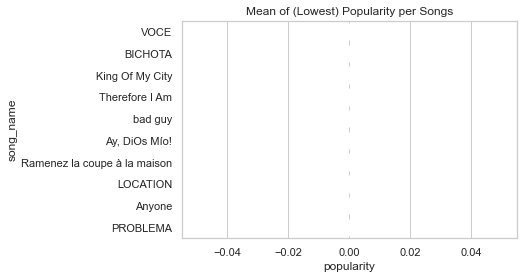

In [114]:
create_barplots('song_name', 'popularity', lowest_song_popularity, 'Mean of (Lowest) Popularity per Songs')

The above bar plot represents the song name vs. the least popular songs. It may need to be looked further into as to why these songs have a popularity score of 0, but are still ranked on the top charts.

#### `Streams` and Highest Charting

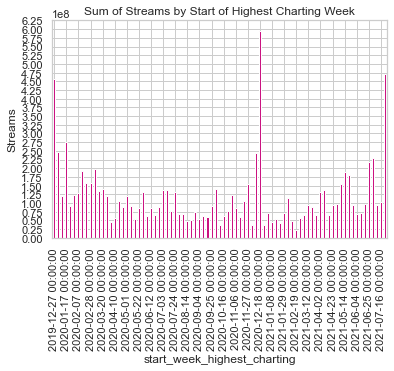

In [133]:
# Start of Week for Highest Charting Streams
initial_df.groupby(['start_week_highest_charting'])['streams'].sum().plot(kind='bar',
                                        title='Sum of Streams by Start of Highest Charting Week',
                                        ylabel='Streams', color='#CB1381')
plt.locator_params(nbins=30);

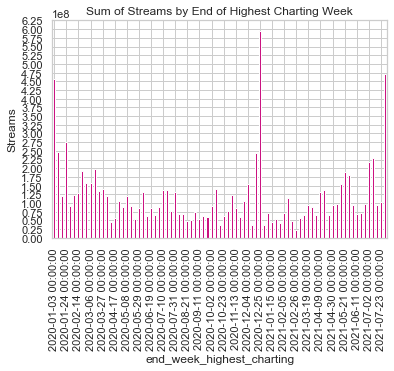

In [135]:
# End of Week for Highest Charting Streams
initial_df.groupby(['end_week_highest_charting'])['streams'].sum().plot(kind='bar',
                                        title='Sum of Streams by End of Highest Charting Week',
                                        ylabel='Streams', color='#CB1381')
plt.locator_params(nbins=30);

Looking further into `streams`, I grouped the feature with the start and end of highest charting week. Looking at the above bar plots, there is a large spike around 2020-12-18 (start week) and 2020-12-25 (end week). This large spike may be the reason why some artists with 0 popularity appear on the top 200. Spikes around Christmas correlates with the artist with the least popularity who are reaching the top 200 because of their Christmas songs.

#### `popularity`

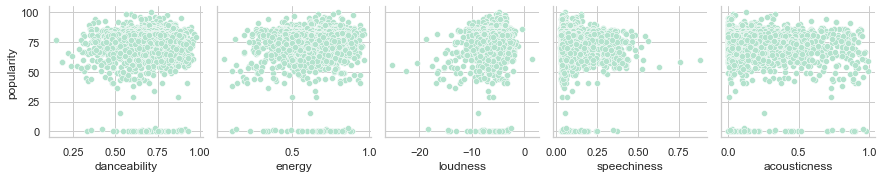

In [141]:
sns.set_palette(sns.color_palette("Pastel2"))
sns.pairplot(data=df, y_vars=['popularity'], x_vars=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness']);

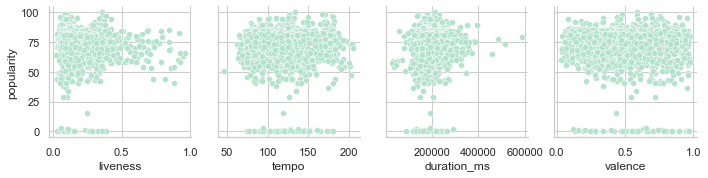

In [118]:

sns.pairplot(data=df, y_vars=['popularity'], x_vars=['liveness', 'tempo', 'duration_ms', 'valence']);

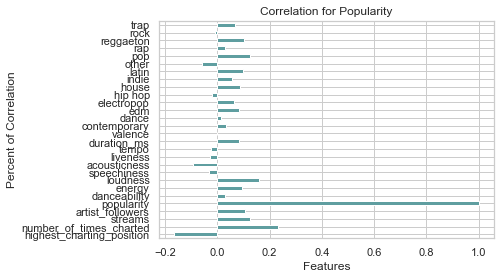

In [119]:
# Plot of Correlation for Popularity
df.corrwith(df['popularity']).plot.barh(color='cadetblue')
plt.title('Correlation for Popularity')
plt.ylabel('Percent of Correlation')
plt.xlabel('Features')
plt.show();

The above bar plot represents the correlation between popularity among the other features. The highest correlation seems to be number of times charted, loudness, pop and streams and the most negative correlation is highest charting posision. The negative correlation makes sense because the higher the number the worse the song is on the charts. Therefore, a "1" on the charts is better than a "200" and is why there is a negative correlation.

#### `artist_followers`

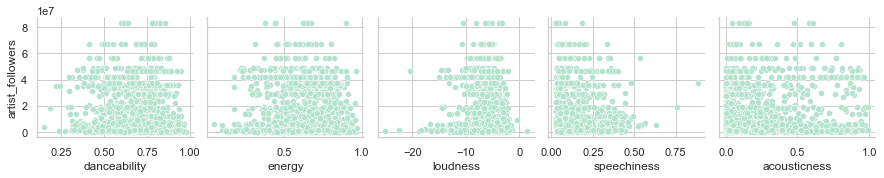

In [120]:
sns.pairplot(data=df, y_vars=['artist_followers'], x_vars=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness']);

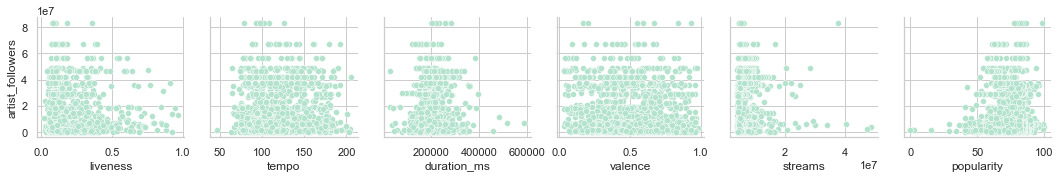

In [121]:
sns.pairplot(data=df, y_vars=['artist_followers'], x_vars=['liveness', 'tempo', 'duration_ms', 'valence','streams', 'popularity']);

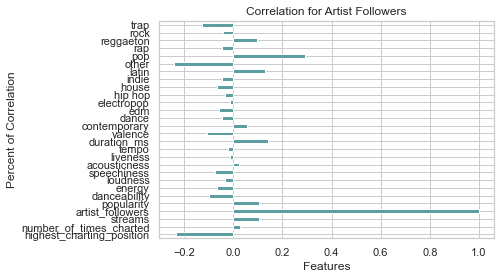

In [122]:
# Plot of Correlation for Artist Followers
df.corrwith(df['artist_followers']).plot.barh(color='cadetblue')
plt.title('Correlation for Artist Followers')
plt.ylabel('Percent of Correlation')
plt.xlabel('Features')
plt.show();

The above bar plot represents the correlation with artist followers among the other features in the dataset. There is a positive correlation with pop, duration, and latin and a negative correlation with other and highest charting position. Again, the negative correlation makes sense because the higher the number the worse the song is on the charts. Therefore, a "1" on the charts is better than a "200" and is why there is a negative correlation.

Also note that those who like pop/latin/reggaeton artists are more likely to follow those artists than those who listen or like a single song in genres such as trap/rock/rap.

#### `release_date`

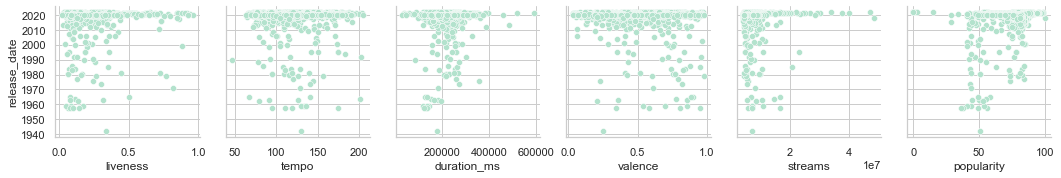

In [123]:
sns.pairplot(data=df, y_vars=['release_date'], x_vars=['liveness', 'tempo', 'duration_ms', 'valence','streams', 'popularity']);

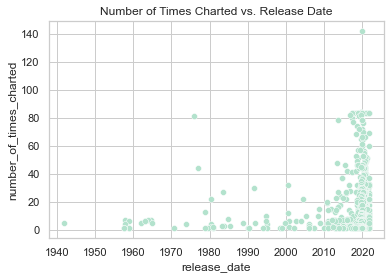

In [124]:
sns.scatterplot(data=df, y='number_of_times_charted', x='release_date').set_title('Number of Times Charted vs. Release Date');

In [125]:
df[df['release_date']<'1970']

,highest_charting_position,number_of_times_charted,week_of_highest_charting,song_name,streams,artist,artist_followers,genre,release_date,weeks_charted,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence,chord,start_week_highest_charting,end_week_highest_charting,contemporary,dance,edm,electropop,hip hop,house,indie,latin,other,pop,rap,reggaeton,rock,trap
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
623,5,7,2020-12-18--2020-12-25,Rockin' Around The Christmas Tree,16613649.0,Brenda Lee,222627.0,"['adult standards', 'brill building pop', 'eas...",1964-10-19,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,58.0,0.589,0.472,-8.749,0.0502,0.614,0.5050,67.196,126267.0,0.898,G#/Ab,2020-12-18,2020-12-25,0,0,0,0,0,0,0,0,4,1,0,0,1,0
624,7,7,2020-12-18--2020-12-25,Jingle Bell Rock,16527404.0,Bobby Helms,20637.0,[],1957-12-02,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,56.0,0.754,0.424,-8.463,0.0363,0.643,0.0652,119.705,130973.0,0.806,D,2020-12-18,2020-12-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0
626,8,7,2020-12-18--2020-12-25,It's the Most Wonderful Time of the Year,14582001.0,Andy Williams,369548.0,"['adult standards', 'brill building pop', 'eas...",1963-11-24,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,55.0,0.240,0.598,-8.435,0.0369,0.766,0.1170,201.629,151933.0,0.776,G,2020-12-18,2020-12-25,0,0,0,0,0,0,0,0,5,1,0,0,0,0
629,11,6,2020-12-18--2020-12-25,Let It Snow! Let It Snow! Let It Snow!,10884855.0,Dean Martin,1139096.0,"['adult standards', 'easy listening', 'lounge'...",1959-01-01,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,54.0,0.451,0.240,-14.014,0.0351,0.912,0.1750,134.009,117147.0,0.701,C#/Db,2020-12-18,2020-12-25,0,0,0,0,0,0,0,0,4,0,0,0,0,0
632,16,6,2020-12-18--2020-12-25,Sleigh Ride,10508459.0,The Ronettes,1251372.0,[],1963-01-01,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,50.0,0.529,0.772,-7.013,0.0287,0.403,0.3160,91.751,181267.0,0.853,D,2020-12-18,2020-12-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0
638,32,5,2020-12-18--2020-12-25,The Christmas Song (Merry Christmas To You),8478518.0,Nat King Cole,1634288.0,"['adult standards', 'lounge', 'soul', 'vocal j...",1962-01-01,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,53.0,0.319,0.210,-15.231,0.0341,0.920,0.1380,78.696,192160.0,0.209,C#/Db,2020-12-18,2020-12-25,0,0,0,0,0,0,0,0,4,0,0,0,0,0
639,39,5,2020-12-18--2020-12-25,White Christmas,7045348.0,"Bing Crosby, Ken Darby Singers, John Scott Tro...",359973.0,"['adult standards', 'easy listening', 'lounge'...",1942-01-01,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,51.0,0.317,0.158,-16.485,0.0381,0.673,0.3380,130.503,177480.0,0.247,A,2020-12-18,2020-12-25,0,0,0,0,0,0,0,0,5,0,0,0,0,0
641,42,5,2020-12-18--2020-12-25,A Holly Jolly Christmas - Single Version,6716353.0,Burl Ives,58479.0,"['adult standards', 'american folk revival']",1965-01-01,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,49.0,0.683,0.375,-13.056,0.0303,0.579,0.0760,140.467,135533.0,0.888,C,2020-12-18,2020-12-25,0,0,0,0,0,0,0,0,2,0,0,0,0,0
644,62,4,2020-12-18--2020-12-25,Blue Christmas,6007011.0,Elvis Presley,5698788.0,"['rock-and-roll', 'rockabilly']",1957-10-15,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,49.0,0.465,0.270,-16.661,0.0425,0.900,0.1450,94.518,129173.0,0.580,E,2020-12-18,2020-12-25,0,0,0,0,0,0,0,0,0,0,0,0,2,0


When plotting number of times charted with release date, there are outliers that have made it onto the top 200 charts.
When looking further into songs released before 1970, all songs are Christmas songs.

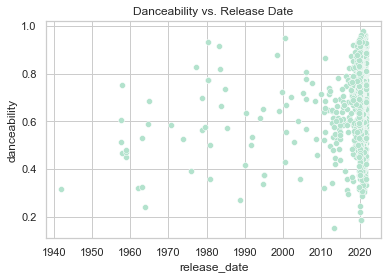

In [126]:
sns.scatterplot(data=df, y='danceability', x='release_date').set_title('Danceability vs. Release Date');

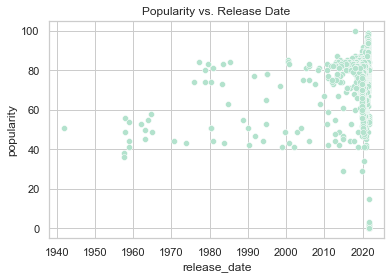

In [127]:
sns.scatterplot(data=df, y='popularity', x='release_date').set_title('Popularity vs. Release Date');

Most songs that are popular were released after 2010.

Looking into the pairplots for release date, most points are clustered towards 2020 and after 2010.

In the next notebook, [02_Preprocessing_And_Modeling](./02_Preprocessing_And_Modeling.ipynb), I work on preprocessing steps and modeling.

In [128]:
# df to CSV
df.to_csv('./datasets/spotify_1_df.csv', index=True)